The goal of this notebook is to compute the z-score and the chi2 for each subject and then plot the histogram

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
Embeddings_UKB= pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Output/2025-09-16/17-12-53/Embeddings.csv")
Embeddings_HCP= pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Output/2025-09-16/17-12-53/hcp/Embeddings.csv")
Embeddings_epilepsy= pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Output/2025-09-16/17-12-53/epilepsy_PBS/Embeddings.csv")

In [3]:
Participants_epilepsy=pd.read_csv("/neurospin/dico/data/human/epilepsy_PBS/participants.tsv", sep="\t")

epilepsy_controls= Participants_epilepsy[Participants_epilepsy["Diagnosis"]=="controls"]
epilepsy_irm_neg= Participants_epilepsy[Participants_epilepsy["Diagnosis"]=="irm_negatives_centrales"]
epilepsy_irm_pos= Participants_epilepsy[Participants_epilepsy["Diagnosis"]=="irm_positives_centrales"]

In [4]:
Embeddings_epilepsy  = Embeddings_epilepsy.rename(columns={Embeddings_epilepsy.columns[0]: "Index"})

Embeddings_controls = Embeddings_epilepsy.merge(epilepsy_controls[["Index"]], on="Index", how="inner")
Embeddings_irm_negatives = Embeddings_epilepsy.merge(epilepsy_irm_neg[["Index"]], on="Index", how="inner")
Embeddings_irm_positives = Embeddings_epilepsy.merge(epilepsy_irm_pos[["Index"]], on="Index", how="inner")

In [5]:
scaler = StandardScaler()

scaler.fit(Embeddings_UKB.iloc[:,1:])

Z_score_UKB=scaler.transform(Embeddings_UKB.iloc[:,1:])
Z_score_HCP=scaler.transform(Embeddings_HCP.iloc[:,1:])
Z_score_controls=scaler.transform(Embeddings_controls.iloc[:,1:])
Z_score_irm_negatives=scaler.transform(Embeddings_irm_negatives.iloc[:,1:])
Z_score_irm_positives=scaler.transform(Embeddings_irm_positives.iloc[:,1:])

In [6]:
chi2_UKB = np.sum(Z_score_UKB**2, axis=1, keepdims=True)
chi2_HCP = np.sum(Z_score_HCP**2, axis=1, keepdims=True)
chi2_controls = np.sum(Z_score_controls**2, axis=1, keepdims=True)
chi2_irm_negatives = np.sum(Z_score_irm_negatives**2, axis=1, keepdims=True)
chi2_irm_positives = np.sum(Z_score_irm_positives**2, axis=1, keepdims=True)

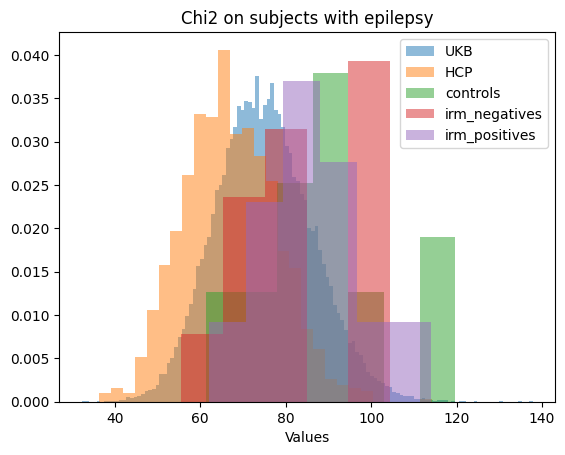

In [7]:
plt.hist(chi2_UKB[:,0], bins="auto", alpha=0.5, label="UKB", density=True)
plt.hist(chi2_HCP[:,0], bins="auto", alpha=0.5, label="HCP", density=True)
plt.hist(chi2_controls[:,0], bins="auto", alpha=0.5, label="controls", density=True)
plt.hist(chi2_irm_negatives[:,0], bins="auto", alpha=0.5, label="irm_negatives", density=True)
plt.hist(chi2_irm_positives[:,0], bins="auto", alpha=0.5, label="irm_positives", density=True)

plt.xlabel("Values")

plt.title("Chi2 on subjects with epilepsy")
plt.legend()
plt.show()